In [1]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
v.fit(['Thor Hathodwala is looking for a job'])
v.vocabulary_

{'thor': 5, 'hathodwala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [2]:
v=CountVectorizer(ngram_range=(2,2))
v.fit(['Thor Hathodwala is looking for a job'])
v.vocabulary_

{'thor hathodwala': 4,
 'hathodwala is': 1,
 'is looking': 2,
 'looking for': 3,
 'for job': 0}

In [3]:
v=CountVectorizer(ngram_range=(1,3))
v.fit(['Thor Hathodwala is looking for a job'])
v.vocabulary_

{'thor': 12,
 'hathodwala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodwala': 13,
 'hathodwala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodwala is': 14,
 'hathodwala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [4]:
corpus=[
    'Thor ate pizza',
    'Loki is tall',
    'Loki is eating Pizza'
]

In [5]:
import spacy
nlp=spacy.load('en_core_web_sm')
def preprocessing(text):
    doc=nlp(text)
    
    filtered_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)
preprocessing('Thor ate pizza')

'Thor eat pizza'

In [6]:
preprocessing('Thor is eating pizza')

'Thor eat pizza'

In [7]:
corpus_processed=[preprocessing(text) for text in corpus]
corpus_processed

['Thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [8]:
v=CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [9]:
v.transform(['Thor eat pizza']).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [10]:
v.transform(['Hulk eat pizza']).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [11]:
import pandas as pd
df=pd.read_json('news_dataset.json')
print(df.shape)
df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [12]:
df.category.unique()

array(['SCIENCE', 'BUSINESS', 'CRIME', 'SPORTS'], dtype=object)

In [13]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [14]:
target={'BUSINESS':0,'SPORTS':1,'CRIME':2,'SCIENCE':3}
df

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME
...,...,...
12690,Coach Shakes Hands Of Imaginary Players After ...,SPORTS
12691,This Minivan-Sized Sea Sponge Is Thought To Be...,SCIENCE
12692,RECAP: Dramatic Eclipse Photos Don't miss the ...,SCIENCE
12693,Richard Sherman Wants To Talk About Police Sho...,SPORTS


In [15]:
min_samples=1381
df_business=df[df.category=='BUSINESS'].sample(min_samples,random_state=2022)
df_business

,text,category
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS
2912,From the Other Side; an Honest Review from Emp...,BUSINESS
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS
502,How to Market Your Business While Traveling th...,BUSINESS
5279,How to Leverage Intuition in Decision-making I...,BUSINESS
...,...,...
4963,"Interview With Amanda Barbara of Pubslush, Cro...",BUSINESS
589,Welcome to the Age of Context-Driven Sales and...,BUSINESS
687,Crude Oil Train Derails In Montana An oil trai...,BUSINESS
2961,Helping a Person Live Like They Were Dying Lor...,BUSINESS


In [16]:
df_sports=df[df.category=='SPORTS'].sample(min_samples,random_state=2022)
df_crime=df[df.category=='CRIME'].sample(min_samples,random_state=2022)
df_science=df[df.category=='SCIENCE'].sample(min_samples,random_state=2022)

In [17]:
df_balanced=pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced

,text,category
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS
2912,From the Other Side; an Honest Review from Emp...,BUSINESS
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS
502,How to Market Your Business While Traveling th...,BUSINESS
5279,How to Leverage Intuition in Decision-making I...,BUSINESS
...,...,...
2178,Aquarium To Monitor Animals' Behavior Changes ...,SCIENCE
5682,How Google Glass Could Save Lives In The Hospi...,SCIENCE
1643,Honda's Gravity Modification Research For us A...,SCIENCE
11428,EVERYONE Loves Alternative Facts THE POWER OF ...,SCIENCE


In [18]:
df_balanced.category.value_counts()

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

In [19]:
df_balanced['category_num']=df_balanced.category.map(target)
df_balanced

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0
...,...,...,...
2178,Aquarium To Monitor Animals' Behavior Changes ...,SCIENCE,3
5682,How Google Glass Could Save Lives In The Hospi...,SCIENCE,3
1643,Honda's Gravity Modification Research For us A...,SCIENCE,3
11428,EVERYONE Loves Alternative Facts THE POWER OF ...,SCIENCE,3


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_balanced.text,
                                              df_balanced.category_num,
                                              test_size=0.2,
                                              random_state=2022,
                                              stratify=df_balanced.category_num)

In [21]:
print(x_train.shape)
x_train.head()

(4419,)


7589     Ovulating Women Prefer Images of Penetration O...
10442    Scientists Discover Spooky Influence On Baby N...
8792     Olympic Race Walker Steps Up To Propose To His...
1733     Beloved Bipedal Bear Named Pedals Believed Kil...
2526     Elizabeth Smart Gave Birth To Baby Girl, Fathe...
Name: text, dtype: object

In [22]:
y_train.value_counts()

3    1105
2    1105
0    1105
1    1104
Name: category_num, dtype: int64

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
clf=Pipeline([
    ('vectorizer_bow', CountVectorizer()),
    ('Multi NB',MultinomialNB())
])
clf.fit(x_train,y_train)
clf.predict(x_test)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
clf=Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ('Multi NB',MultinomialNB())
])
clf.fit(x_train,y_train)
clf.predict(x_test)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



In [25]:
x_test[:5]

3716     African Nation Slaps Exxon With Fine Nearly 7 ...
608      These Cringe-Worthy Stories Show It Can Be Har...
11172    LISTEN: The Accidental Discovery That Proved T...
1346     Build Loyalty -- The Cost -- $00.00 Remember y...
1356     Man Killed By Michigan Police Wasn't Targeting...
Name: text, dtype: object

In [26]:
y_test[:5]

3716     0
608      3
11172    3
1346     0
1356     2
Name: category_num, dtype: int64

In [27]:
y_pred[:5]

array([0, 0, 3, 0, 2], dtype=int64)

In [28]:
target

{'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

In [29]:
df_balanced['preprocessed']=df_balanced.text.apply(preprocessing)
df_balanced

,text,category,category_num,preprocessed
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,gcc business leader remain confident face Regi...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks talk give build ...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage Intuition decision make feel safe rel...
...,...,...,...,...
2178,Aquarium To Monitor Animals' Behavior Changes ...,SCIENCE,3,aquarium Monitor Animals Behavior change Eclip...
5682,How Google Glass Could Save Lives In The Hospi...,SCIENCE,3,Google Glass save life hospital ER new study h...
1643,Honda's Gravity Modification Research For us A...,SCIENCE,3,Honda Gravity Modification Research Americans ...
11428,EVERYONE Loves Alternative Facts THE POWER OF ...,SCIENCE,3,love Alternative fact power story 21st CENTURY...


In [30]:
x_train,x_test,y_train,y_test=train_test_split(df_balanced.preprocessed,
                                              df_balanced.category_num,
                                              test_size=0.2,
                                              random_state=2022,
                                              stratify=df_balanced.category_num)

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
clf=Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ('Multi NB',MultinomialNB())
])
clf.fit(x_train,y_train)
clf.predict(x_test)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       276
           1       0.93      0.83      0.88       277
           2       0.82      0.92      0.87       276
           3       0.91      0.81      0.86       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[241,   9,  16,  10],
       [ 10, 229,  30,   8],
       [ 16,   2, 253,   5],
       [ 39,   5,   8, 224]], dtype=int64)

Text(69.0, 0.5, 'Truth')

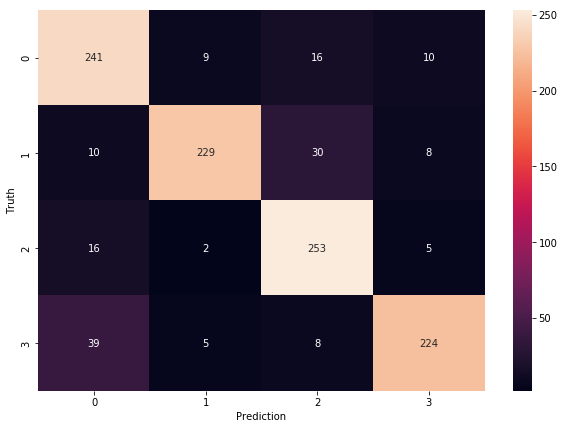

In [36]:
from matplotlib import pyplot as plt 
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')